CUSTOMER SERVICE ANALYSIS

This [dataset](https://www.kaggle.com/datasets/ddosad/ecommerce-customer-service-satisfaction) is from kaggle. It captures customer satisfaction scores for a one-month period at an e-commerce platform called Shopzilla (a pseudonym). It includes various features such as category and sub-category of interaction, customer remarks, survey response date, category, item price, agent details (name, supervisor, manager), and CSAT score etc. 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [52]:
#%pip install seaborn
import seaborn as sns

In [53]:
df = pd.read_csv('Customer_support_data.csv')
df

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


In [54]:
missing_values = df.isnull().sum()
missing_values

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [55]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


In [56]:
df.dtypes

Unique id                   object
channel_name                object
category                    object
Sub-category                object
Customer Remarks            object
Order_id                    object
order_date_time             object
Issue_reported at           object
issue_responded             object
Survey_response_Date        object
Customer_City               object
Product_category            object
Item_price                 float64
connected_handling_time    float64
Agent_name                  object
Supervisor                  object
Manager                     object
Tenure Bucket               object
Agent Shift                 object
CSAT Score                   int64
dtype: object

In [57]:
date_columns = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Calculate response time in minutes
if 'Issue_reported at' in df.columns and 'issue_responded' in df.columns:
    df['Response time (min)'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# Calculate response time in hours
if 'Issue_reported at' in df.columns and 'issue_responded' in df.columns:
    df['Response time (hrs)'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600

df

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Response time (min),Response time (hrs)
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaT,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,...,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0,0.566667
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaT,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,...,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0,0.033333
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaT,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,...,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0,0.366667
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaT,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,...,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0,0.333333
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaT,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,...,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaT,NaT,NaT,2023-08-31,...,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4,NaN,NaN
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaT,NaT,NaT,2023-08-31,...,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5,NaN,NaN
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaT,NaT,NaT,2023-08-31,...,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5,NaN,NaN
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaT,NaT,NaT,2023-08-31,...,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4,NaN,NaN


Check if the problem with rows not importing properly in R also occured here but they didn't

In [58]:
problem_rows = df.iloc[[15437, 45128, 45176]] 
problem_rows

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Response time (min),Response time (hrs)
15437,592ca42e-477b-424e-8180-cc1b34a59994,Inbound,Returns,Technician Visit,Good in explanation,08eec056-c71d-486d-9b14-7db028ffb08d,NaT,2023-07-08 10:55:00,2023-07-08 11:14:00,2023-08-07,...,NaN,NaN,Shelly Huber,William Park,John Smith,61-90,Evening,5,19.0,0.316667
45128,d0dedecf-cbfb-4173-a2f1-df39d5a96256,Inbound,Order Related,Order status enquiry,Thank you for Shopzilla customer service support,ea2e778e-aacb-411e-ae84-19764a4ba579,NaT,NaT,NaT,2023-08-17,...,NaN,NaN,Ashley Dunlap,Aiden Patel,Olivia Tan,On Job Training,Evening,5,NaN,NaN
45176,ded25269-6294-4cdc-9231-04a0f21d4093,Inbound,Order Related,Invoice request,NaN,2861535e-8361-4d27-8dfe-ee2bdb375be6,NaT,NaT,NaT,2023-08-17,...,NaN,NaN,Joshua Ortiz,Ava Wong,Jennifer Nguyen,On Job Training,Morning,5,NaN,NaN


In [59]:
# Setting up the visualization style
plt.style.use('ggplot')
sns.set(style="whitegrid")

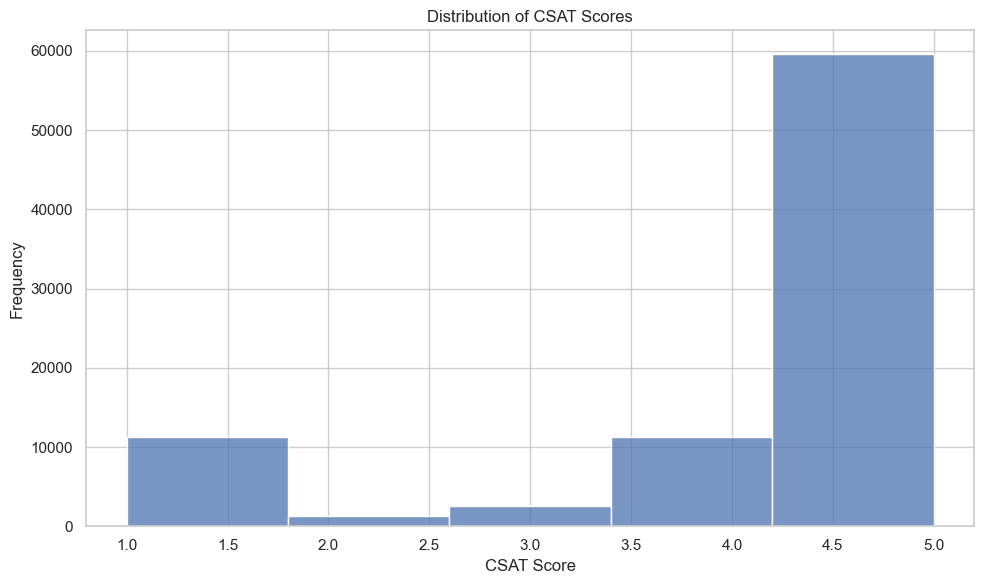

In [60]:
# Distribution of CSAT scores
plt.figure(figsize=(10, 6))
sns.histplot(df['CSAT Score'], kde=False, bins=5)
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

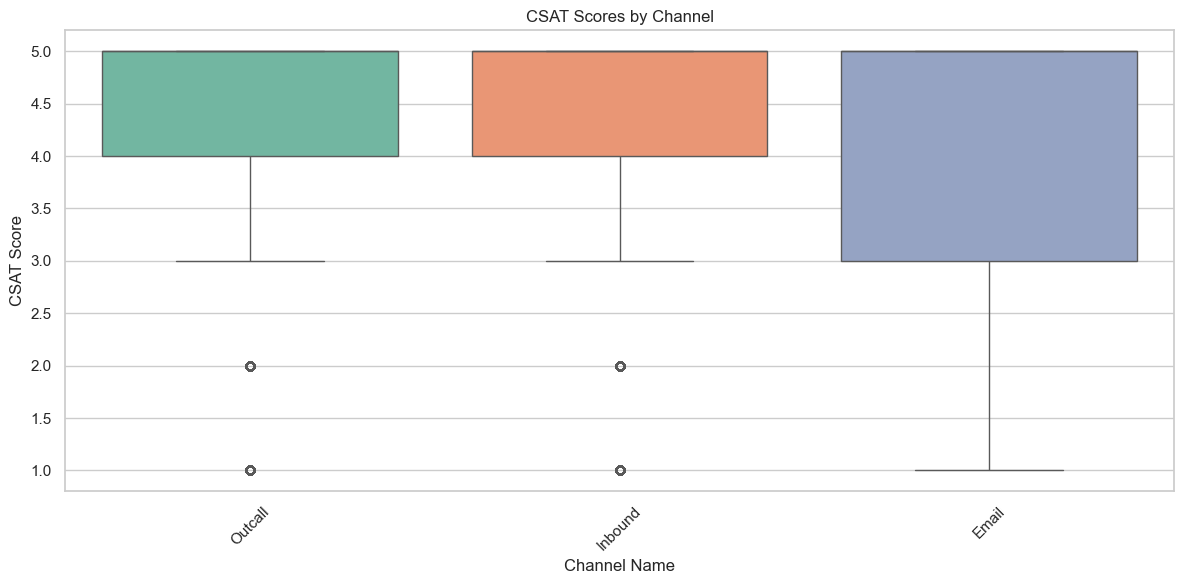

In [61]:
# CSAT by channel
plt.figure(figsize=(12, 6))
sns.boxplot(x='channel_name', y='CSAT Score', data=df, palette="Set2")
plt.xlabel('Channel Name')
plt.ylabel('CSAT Score')
plt.title('CSAT Scores by Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

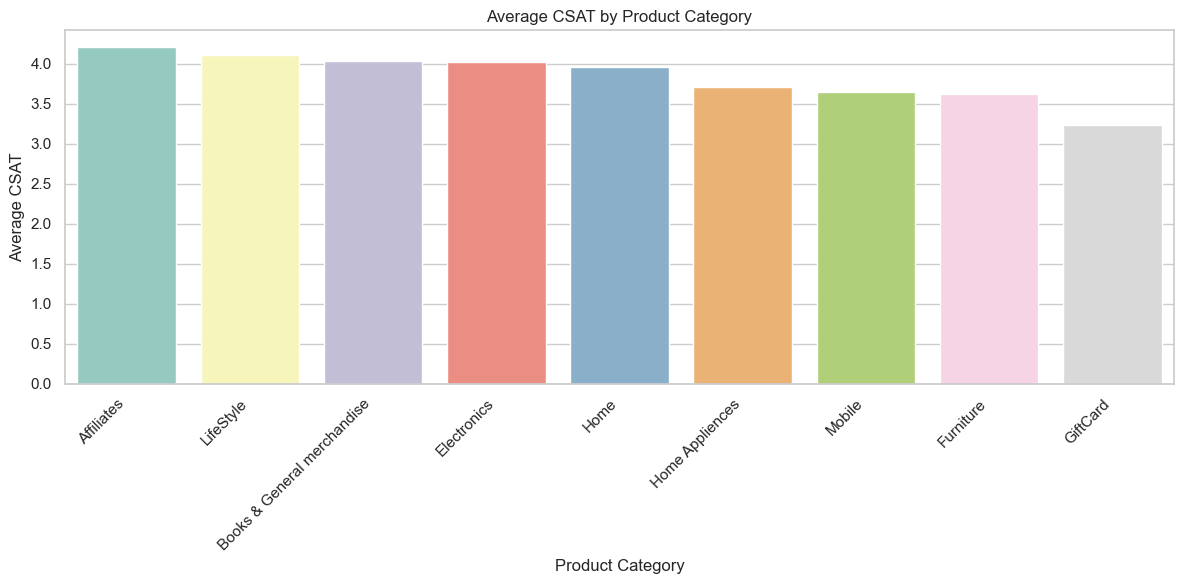

In [62]:
# CSAT by product category
plt.figure(figsize=(12, 6))
avg_csat = df.groupby('Product_category')['CSAT Score'].mean().sort_values(ascending=False)
sns.barplot(x=avg_csat.index, y=avg_csat.values, palette="Set3")
plt.title('Average CSAT by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average CSAT')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

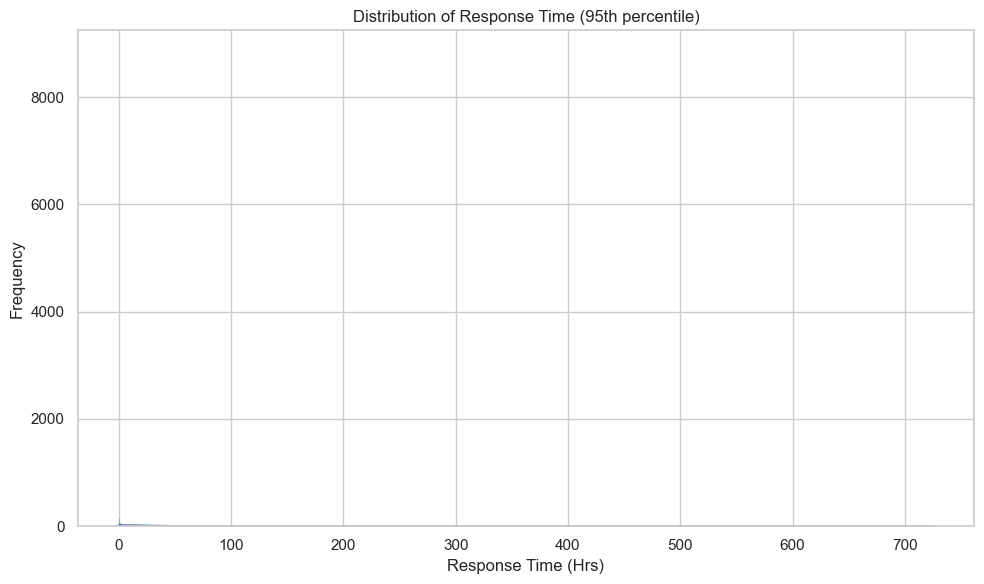

In [63]:
# Response time analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Response time (hrs)'].clip(upper=df['Response time (hrs)'].quantile(0.95)), kde=True)
plt.title('Distribution of Response Time (95th percentile)')
plt.xlabel('Response Time (Hrs)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

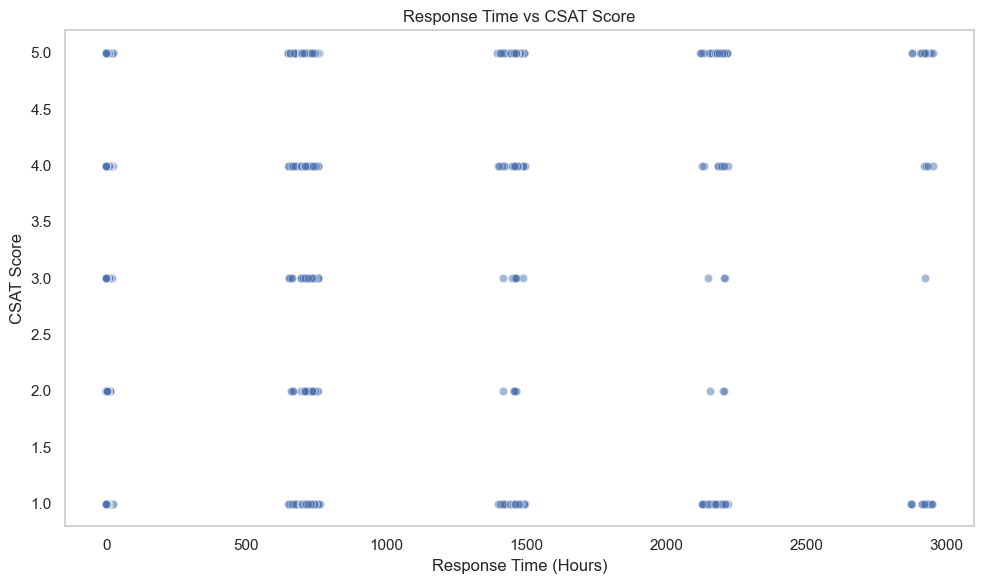

In [64]:
# Response time vs CSAT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Response time (hrs)', y='CSAT Score', data=df, alpha=0.5)
plt.title('Response Time vs CSAT Score')
plt.xlabel('Response Time (Hours)')
plt.ylabel('CSAT Score')
plt.grid(False)
plt.tight_layout()
plt.show()

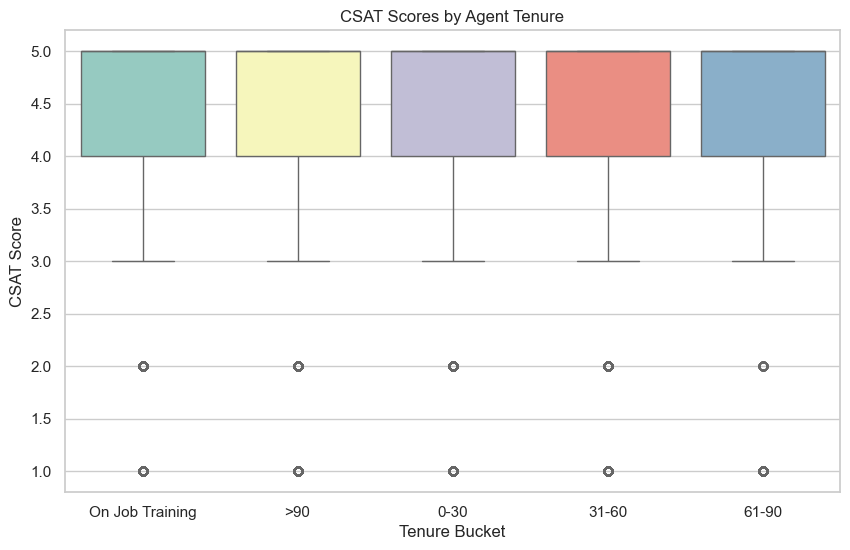

In [65]:
# CSAT by agent tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tenure Bucket', y='CSAT Score', data=df, palette="Set3")
plt.title('CSAT Scores by Agent Tenure')
plt.xlabel('Tenure Bucket')
plt.ylabel('CSAT Score')
plt.show()

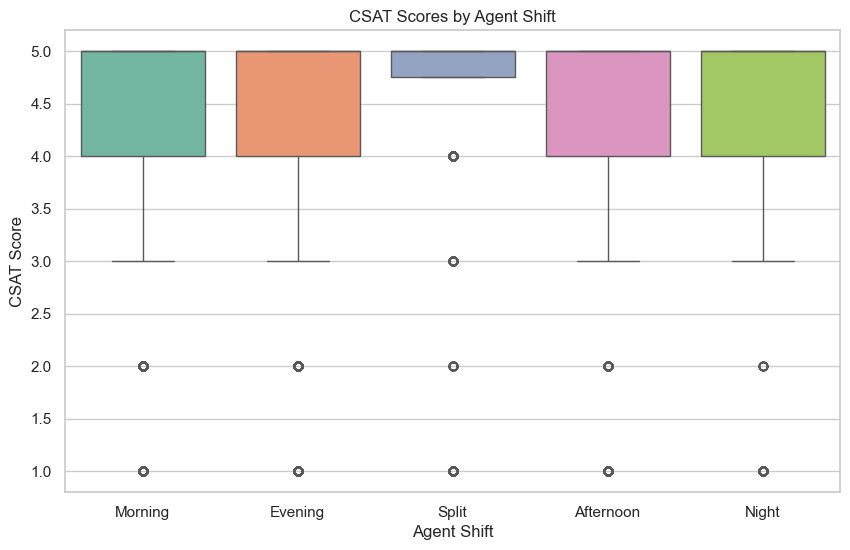

In [66]:
# CSAT by agent shift
plt.figure(figsize=(10, 6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df, palette="Set2")
plt.title('CSAT Scores by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

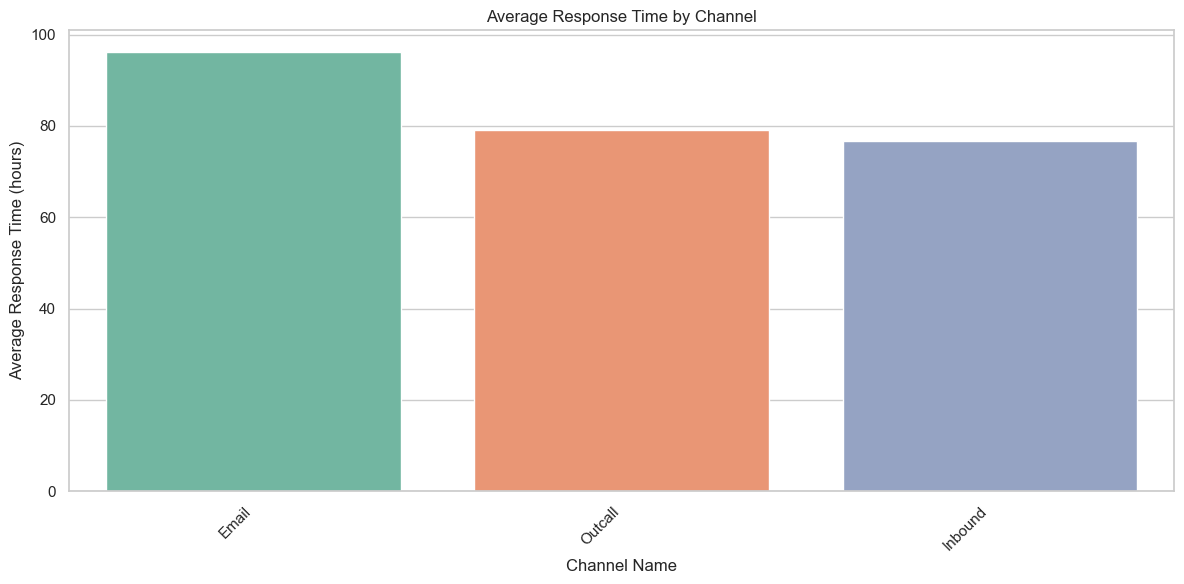

In [67]:
# Average Response time by channel
plt.figure(figsize=(12, 6))
avg_handling = df.groupby('channel_name')['Response time (hrs)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_handling.index, y=avg_handling.values, palette="Set2")
plt.title('Average Response Time by Channel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Channel Name')
plt.ylabel('Average Response Time (hours)')
plt.tight_layout()
plt.show()

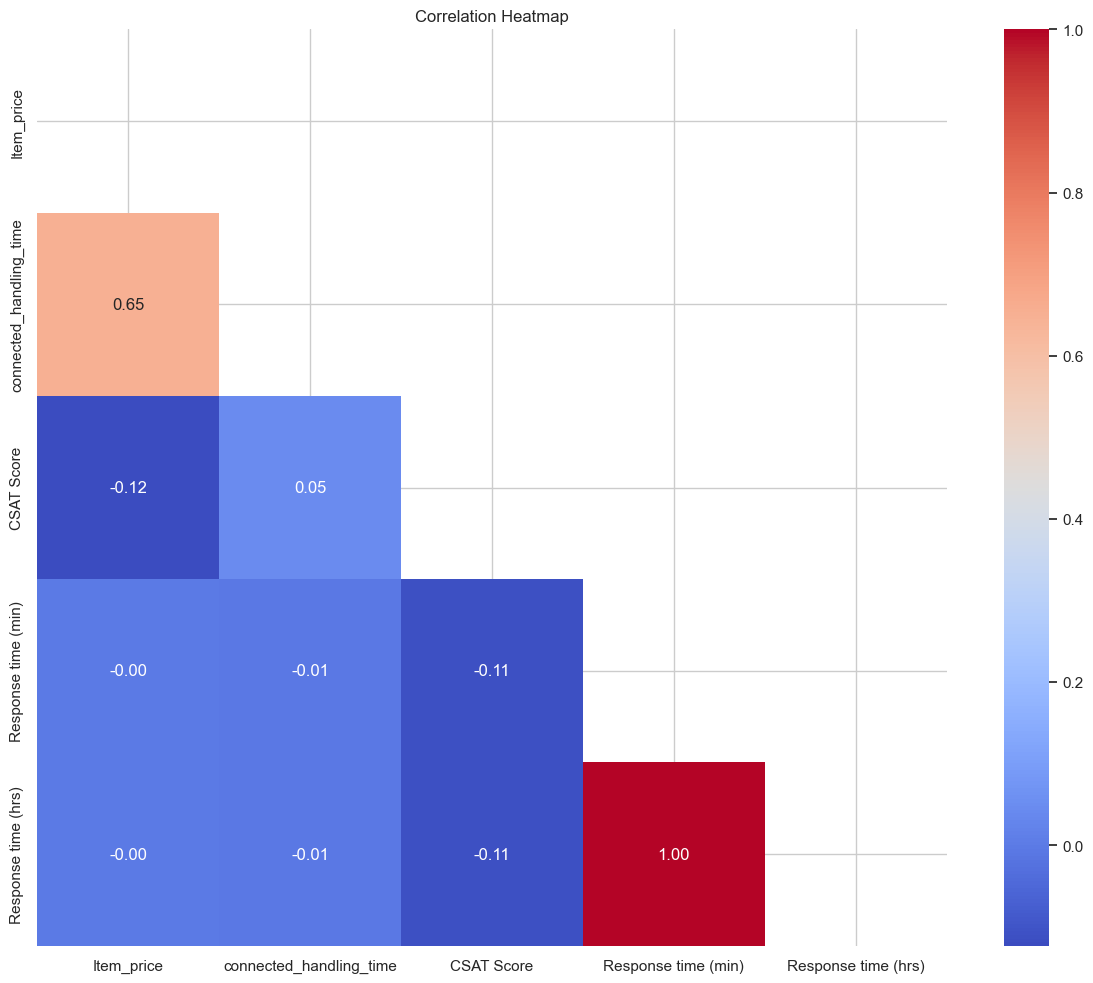

In [68]:
# Correlation heatmap of numeric variables
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

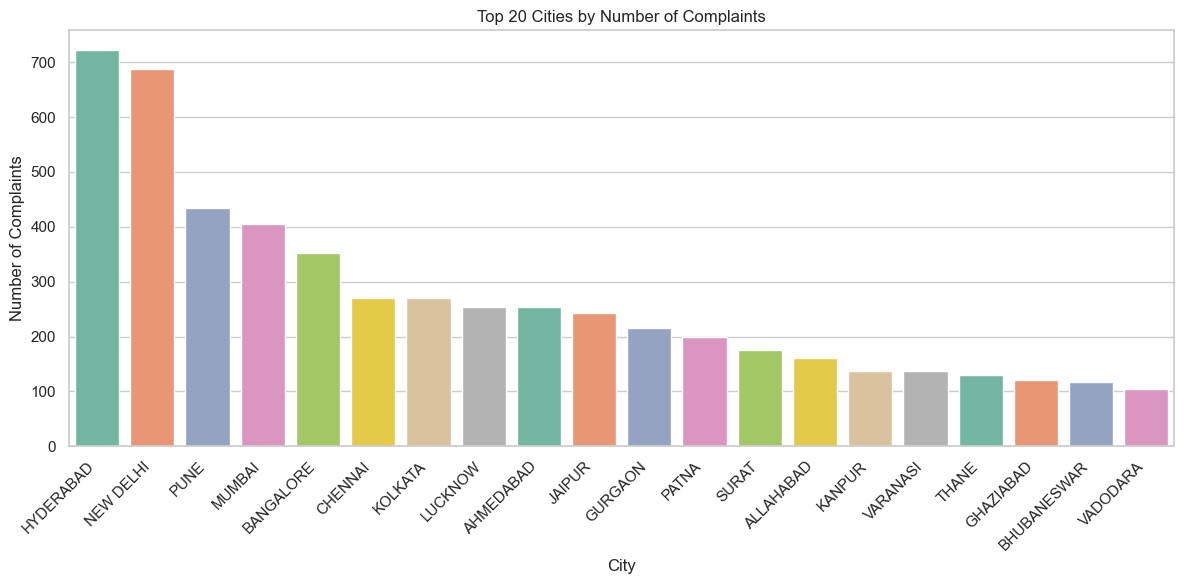

In [69]:
# Top 10 cities by number of issues
plt.figure(figsize=(12, 6))
city_counts = df['Customer_City'].value_counts().head(20)
sns.barplot(x=city_counts.index, y=city_counts.values, palette="Set2")
plt.title('Top 20 Cities by Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.tight_layout()

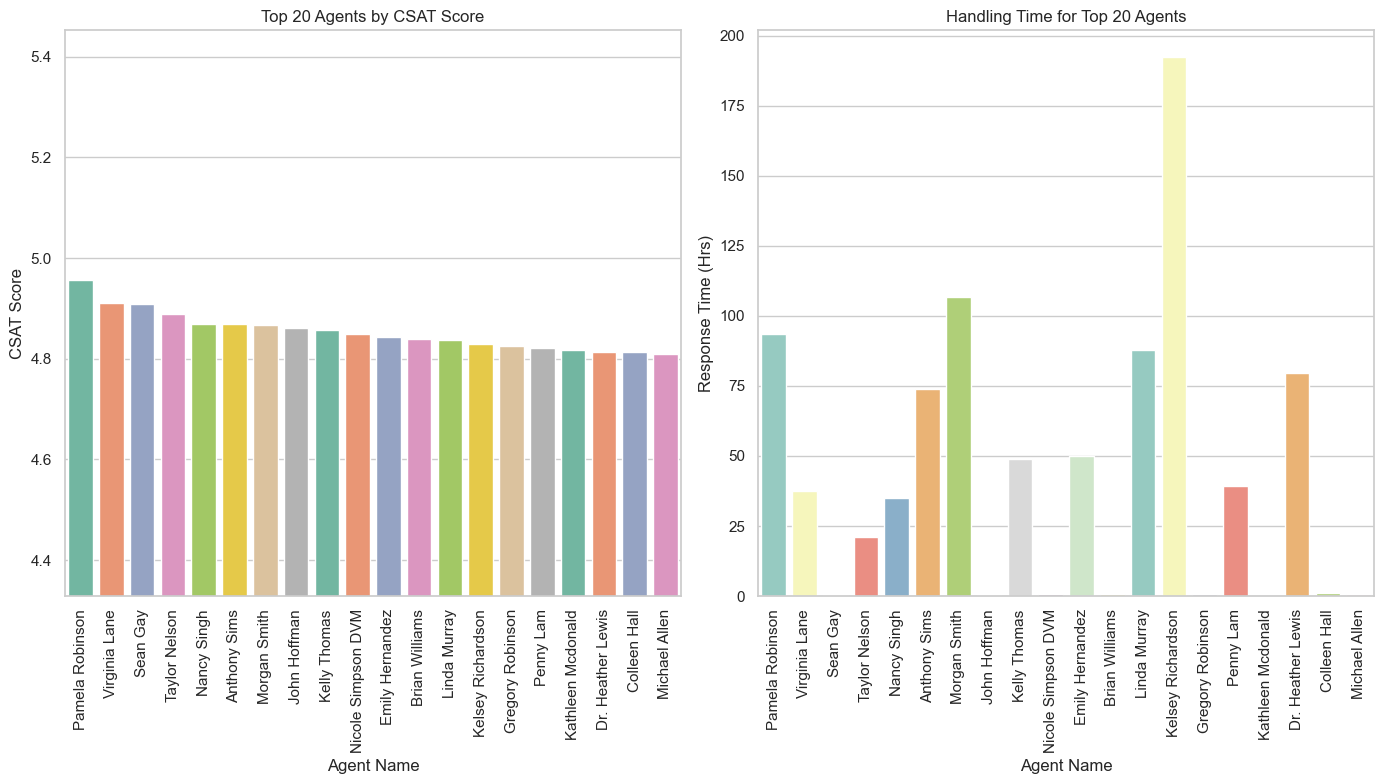

In [70]:
# Agent performance analysis
plt.figure(figsize=(14, 8))
agent_perf = df.groupby('Agent_name').agg({
    'CSAT Score': 'mean',
    'Response time (hrs)': 'mean',
    'Unique id': 'count'
}).sort_values('CSAT Score', ascending=False)
agent_perf = agent_perf.rename(columns={'Unique id': 'Ticket count'})
agent_perf = agent_perf.head(20)  # Top 20 agents by CSAT

plt.subplot(1, 2, 1)
sns.barplot(x=agent_perf.index, y=agent_perf['CSAT Score'], palette="Set2")
plt.title('Top 20 Agents by CSAT Score')
plt.xticks(rotation=90)
plt.xlabel('Agent Name')
plt.ylabel('CSAT Score')
plt.ylim(agent_perf['CSAT Score'].min() * 0.9, agent_perf['CSAT Score'].max() * 1.1)

plt.subplot(1, 2, 2)
sns.barplot(x=agent_perf.index, y=agent_perf['Response time (hrs)'], palette="Set3")
plt.title('Handling Time for Top 20 Agents')
plt.xticks(rotation=90)
plt.xlabel('Agent Name')
plt.ylabel('Response Time (Hrs)')

plt.tight_layout()
plt.show()

Feature Engineering

In [71]:
# Select features
categorical_features = ['channel_name', 'category', 'Sub-category', 'Product_category', 
                       'Customer_City', 'Tenure Bucket', 'Agent Shift']
numeric_features = ['Item_price', 'connected_handling_time', 'Response time (hrs)', 
                   'Remarks_length']

# Add any time-based features created
for col in date_columns:
    if f'{col}_hour' in df.columns:
        numeric_features.append(f'{col}_hour')
    if f'{col}_day' in df.columns:
        numeric_features.append(f'{col}_day')

# Remove any columns that don't exist in the dataset
categorical_features = [col for col in categorical_features if col in df.columns]
numeric_features = [col for col in numeric_features if col in df.columns]


To download [NLTK package](https://www.nltk.org/data.html), I had to follow the instruction from the link and download the specific dependencies (commented with hashtag) I needed from the NLTK package.

In [72]:
# Time-based features
for col in date_columns:
    if col in df.columns:
        df[f'{col}_hour'] = df[col].dt.hour
        df[f'{col}_day'] = df[col].dt.day_of_week
        df[f'{col}_month'] = df[col].dt.month

# Customer sentiment analysis 
df['Remarks_length'] = df['Customer Remarks'].str.len()

#!pip install nltk
import nltk 
#nltk.download()
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('vader_lexicon')  # For sentiment analysis
#nltk.download('averaged_perceptron_tagger')  # For POS tagging
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Basic text cleaning
df['Customer Remarks'] = df['Customer Remarks'].fillna('').astype(str)
df['Remarks_cleaned'] = df['Customer Remarks'].str.lower()  # Lowercase
df['Remarks_cleaned'] = df['Remarks_cleaned'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation

# Tokenization
df['Remarks_tokens'] = df['Remarks_cleaned'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

# Count number of words
df['Remarks_word_count'] = df['Remarks_tokens'].apply(len)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Remarks_filtered'] = df['Remarks_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Remarks_lemmatized'] = df['Remarks_filtered'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['Sentiment_scores'] = df['Customer Remarks'].apply(lambda x: sia.polarity_scores(str(x)))
df['Sentiment_compound'] = df['Sentiment_scores'].apply(lambda x: x['compound'])
df['Sentiment_category'] = df['Sentiment_compound'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Create Bag of Words features
count_vectorizer = CountVectorizer(max_features=100)
bow_matrix = count_vectorizer.fit_transform(df['Remarks_cleaned'])
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
df = pd.concat([df, bow_df], axis=1)

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Remarks_cleaned'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df = pd.concat([df, tfidf_df], axis=1)

# Extract key phrases or topics
# (This is a simple approach - more sophisticated topic modeling might use LDA)
df['Key_nouns'] = df['Remarks_tokens'].apply(lambda x: [word for word, pos in nltk.pos_tag(x) if pos.startswith('NN')])

In [73]:
#!pip install gensim
import gensim
from gensim import corpora
from gensim.models import LdaModel
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

# Create dictionary (mapping of id to word)
dictionary = corpora.Dictionary(df['Remarks_lemmatized'])

# Filter out extreme values (optional but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Adjust parameters based on your data

# Create document-term matrix
corpus = [dictionary.doc2bow(text) for text in df['Remarks_lemmatized']]

# Build LDA model
num_topics = 5  # You can adjust this based on your needs
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=10,
    alpha='auto',
    random_state=42
)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

# Get topic distribution for each document
df['Topic_distribution'] = [lda_model[corpus[i]] for i in range(len(df))]

# Assign primary topic to each document
df['Primary_topic'] = df['Topic_distribution'].apply(
    lambda x: max(x, key=lambda item: item[1])[0] if x else None
)

# Optional: Visualize topics using pyLDAvis
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')

# Extract top keywords for each document based on LDA weights
def get_top_keywords(lda_model, doc_bow, n=3):
    """Get top keywords for a document based on LDA weights"""
    topic_weights = lda_model[doc_bow]
    if not topic_weights:
        return []
    
    # Get the distribution of topics for this document
    topics = sorted(topic_weights, key=lambda x: x[1], reverse=True)
    
    # Get the words for the top topic
    top_topic_idx = topics[0][0]
    topic_terms = lda_model.get_topic_terms(top_topic_idx, n)
    
    # Convert term IDs to actual words
    keywords = [dictionary[term_id] for term_id, _ in topic_terms]
    return keywords

# Apply to each document
df['Top_keywords'] = [get_top_keywords(lda_model, doc) for doc in corpus]

Topic 0: 0.096*"issue" + 0.083*"problem" + 0.040*"solve" + 0.034*"resolve" + 0.033*"resolved" + 0.026*"ok" + 0.021*"solved" + 0.019*"poor" + 0.018*"se" + 0.017*"hai"
Topic 1: 0.458*"good" + 0.144*"service" + 0.078*"thanks" + 0.020*"sir" + 0.013*"great" + 0.013*"bahut" + 0.010*"mam" + 0.009*"h" + 0.008*"provided" + 0.007*"ka"
Topic 2: 0.070*"nice" + 0.044*"time" + 0.040*"delivery" + 0.036*"order" + 0.027*"call" + 0.026*"return" + 0.019*"help" + 0.017*"shopzilla" + 0.016*"refund" + 0.014*"day"
Topic 3: 0.164*"customer" + 0.063*"support" + 0.057*"shopzilla" + 0.057*"executive" + 0.049*"care" + 0.042*"happy" + 0.032*"bad" + 0.024*"person" + 0.023*"best" + 0.021*"experience"
Topic 4: 0.076*"product" + 0.057*"thank" + 0.050*"please" + 0.030*"shopzilla" + 0.019*"make" + 0.019*"policy" + 0.019*"much" + 0.019*"excellent" + 0.016*"u" + 0.015*"seller"


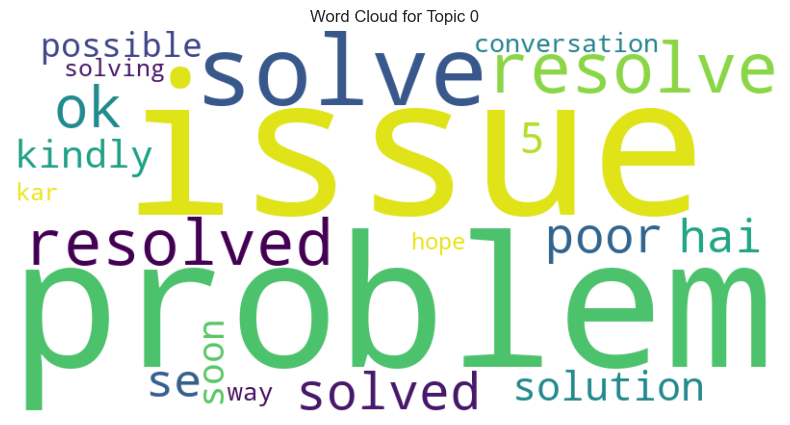

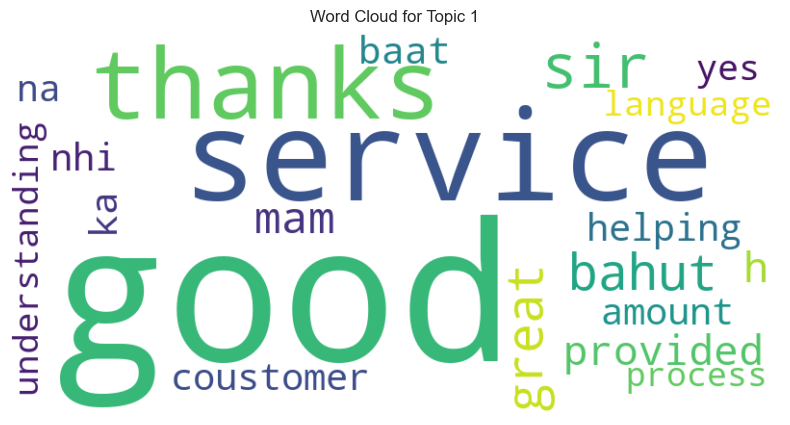

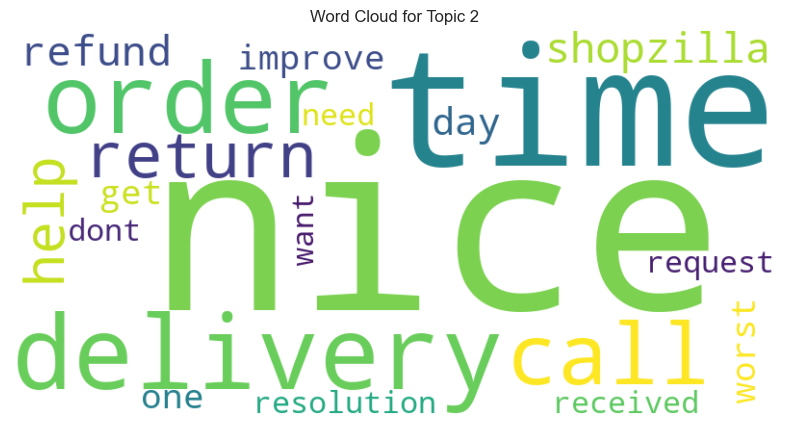

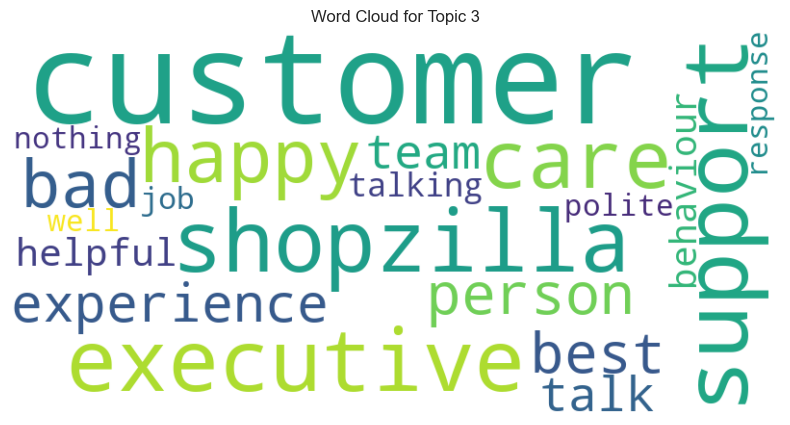

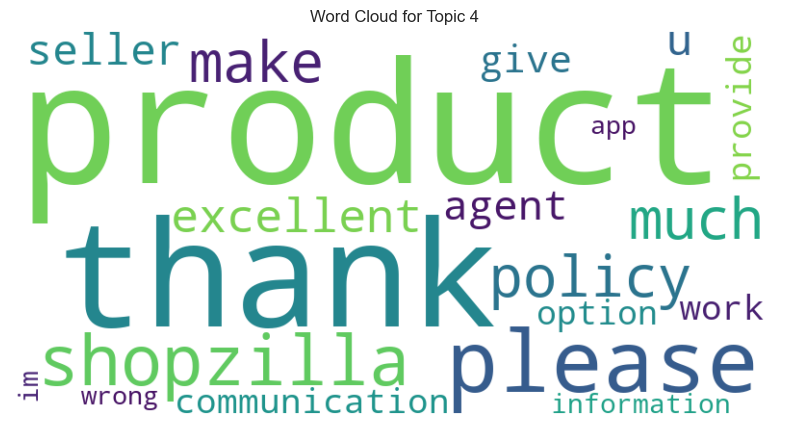

In [74]:
from wordcloud import WordCloud

# Function to generate a word cloud for a topic
def plot_wordcloud(lda_model, topic_id, dictionary):
    topic_terms = lda_model.get_topic_terms(topic_id, topn=20)
    words = {dictionary[word_id]: weight for word_id, weight in topic_terms}

    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='viridis'
    ).generate_from_frequencies(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_id}")
    plt.show()

# Generate word clouds for the first 5 topics
for topic_id in range(5):  # Change based on the number of topics
    plot_wordcloud(lda_model, topic_id, dictionary)


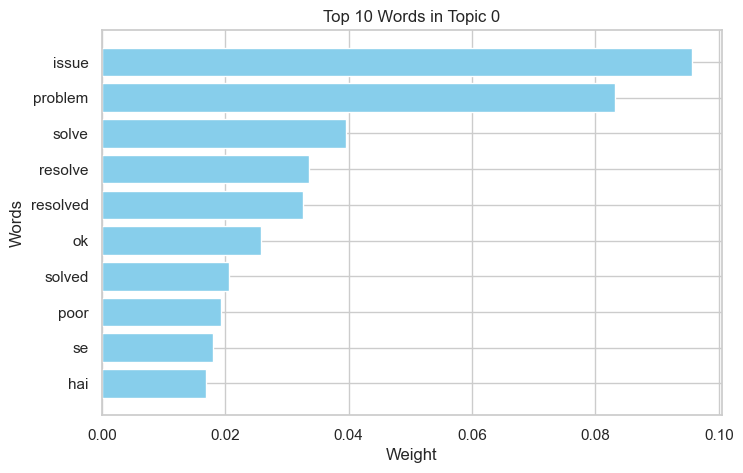

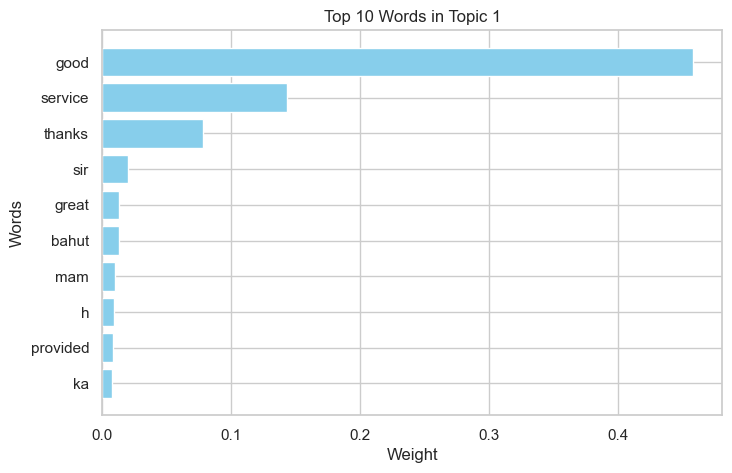

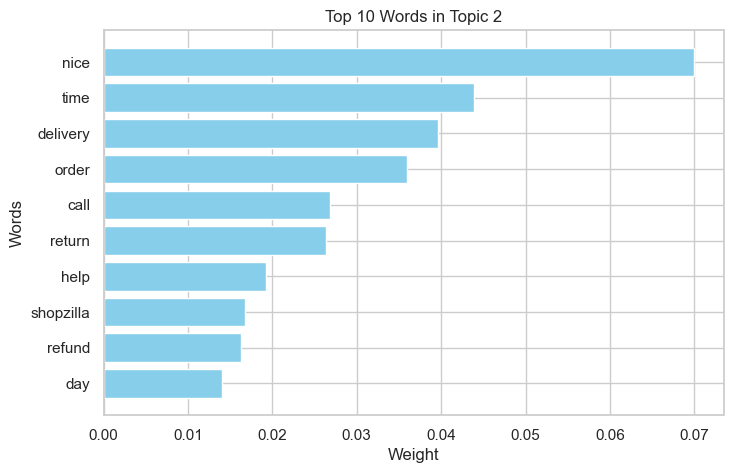

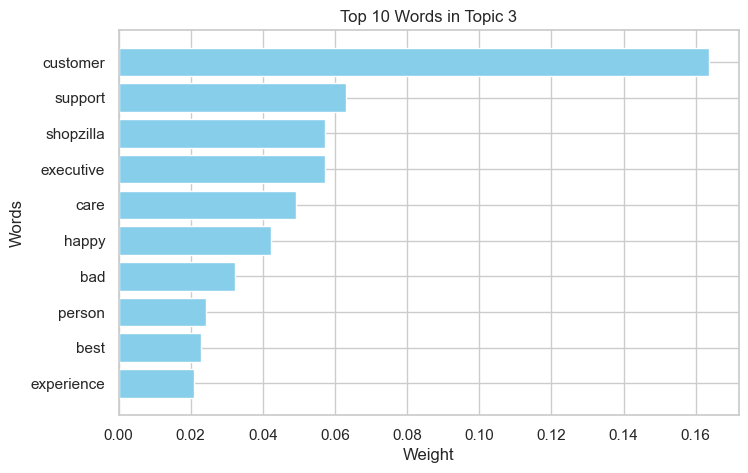

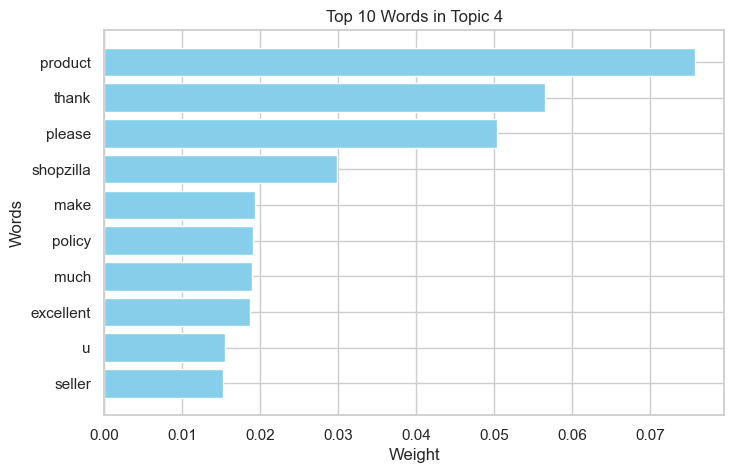

In [75]:
# Function to plot the top words for a given topic
def plot_top_words(lda_model, dictionary, topic_id, n_words=10):
    topic_terms = lda_model.get_topic_terms(topic_id, n_words)
    words = [dictionary[word_id] for word_id, _ in topic_terms]
    weights = [weight for _, weight in topic_terms]

    plt.figure(figsize=(8, 5))
    plt.barh(words, weights, color='skyblue')
    plt.gca().invert_yaxis()  # Highest weight on top
    plt.xlabel("Weight")
    plt.ylabel("Words")
    plt.title(f"Top {n_words} Words in Topic {topic_id}")
    plt.show()

# Plot top words for the first few topics
for topic_id in range(5):  # Adjust based on the number of topics
    plot_top_words(lda_model, dictionary, topic_id)

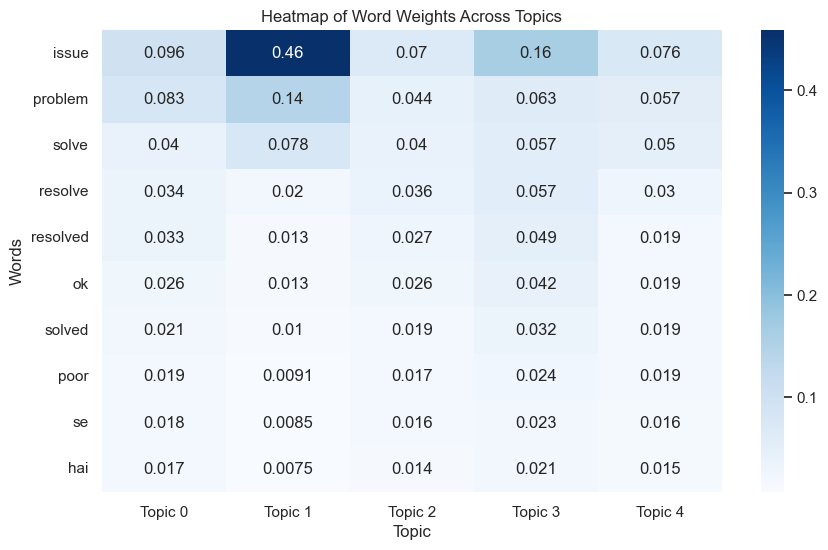

In [76]:
# Create a DataFrame for visualization
topic_word_matrix = np.array([[weight for _, weight in lda_model.get_topic_terms(topic_id, topn=10)] for topic_id in range(5)])
word_labels = [[dictionary[word_id] for word_id, _ in lda_model.get_topic_terms(topic_id, topn=10)] for topic_id in range(5)]

df_topics = pd.DataFrame(topic_word_matrix.T, index=word_labels[0], columns=[f'Topic {i}' for i in range(5)])

plt.figure(figsize=(10, 6))
sns.heatmap(df_topics, annot=True, cmap="Blues")
plt.title("Heatmap of Word Weights Across Topics")
plt.xlabel("Topic")
plt.ylabel("Words")
plt.show()

In [77]:
import pyLDAvis.gensim_models as gensimvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Machine Learning - CSAT Score Prediction

In [78]:
from sklearn.impute import SimpleImputer
df['High_CSAT'] = (df['CSAT Score'] >= 4).astype(int)

# Create X and y
X = df[categorical_features + numeric_features]
y = df['High_CSAT']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create preprocessor with imputation step to make up for NaN values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Add imputer for numeric features
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Add imputer for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train Random Forest model (rest of your code stays the same)
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.07      0.11      3738
           1       0.83      0.96      0.89     17739

    accuracy                           0.81     21477
   macro avg       0.55      0.52      0.50     21477
weighted avg       0.73      0.81      0.76     21477


Accuracy: 0.8070028402477069


Advanced ML - Feature Importance

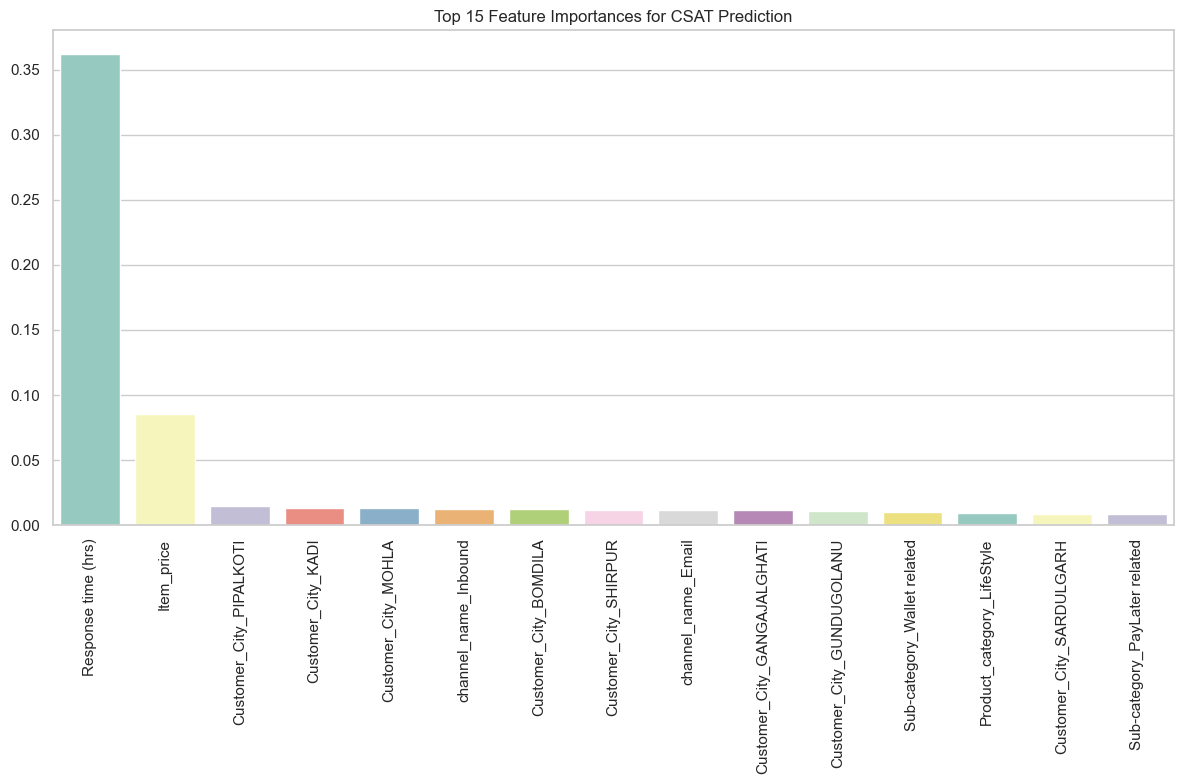

In [79]:
# Extract feature names
feature_names = []

# Get feature names for numeric columns (they stay the same)
feature_names.extend(numeric_features)

# Get feature names for categorical columns after one-hot encoding
for cat_feature in categorical_features:
    # Get unique values for each categorical feature
    unique_values = df[cat_feature].unique()
    for value in unique_values:
        feature_names.append(f"{cat_feature}_{value}")

# Extract feature importances from Random Forest
try:
    # This assumes the feature names match exactly with the transformed features
    rf_importances = rf_classifier.named_steps['classifier'].feature_importances_
    
    # Use the first n importances (may not match exactly with feature_names)
    n_features = min(len(rf_importances), len(feature_names))
    
    # Sort feature importances
    indices = np.argsort(rf_importances)[::-1][:n_features]
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x=[feature_names[i] for i in indices[:15]], y=rf_importances[indices[:15]], palette ="Set3")
    plt.title('Top 15 Feature Importances for CSAT Prediction')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
except:
    print("Couldn't extract feature importances properly - dimensionality issue with feature names")


Logistic Regression Model for Interpretability

In [80]:
# Create and train Logistic Regression model
lr_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

lr_classifier.fit(X_train, y_train)

# Make predictions
lr_y_pred = lr_classifier.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))

print("\nAccuracy:", accuracy_score(y_test, lr_y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.02      0.04      3738
           1       0.83      1.00      0.90     17739

    accuracy                           0.83     21477
   macro avg       0.66      0.51      0.47     21477
weighted avg       0.77      0.83      0.75     21477


Accuracy: 0.8257205382502212


Customer Behavior Analysis

In [81]:
# Group by customer city and analyze patterns
city_analysis = df.groupby('Customer_City').agg({
    'Unique id': 'count',
    'CSAT Score': 'mean',
    'Response time (hrs)': 'mean'
}).sort_values('Unique id', ascending=False).head(10)

city_analysis = city_analysis.rename(columns={'Unique id': 'Ticket count'})

print("\nTop 10 Cities Analysis:")
print(city_analysis)

# Product category analysis
product_analysis = df.groupby('Product_category').agg({
    'Unique id': 'count',
    'CSAT Score': 'mean',
    'Response time (hrs)': 'mean',
    'Item_price': 'mean'
}).sort_values('Unique id', ascending=False)

product_analysis = product_analysis.rename(columns={'Unique id': 'Ticket count'})

print("\nProduct Category Analysis:")
print(product_analysis)



Top 10 Cities Analysis:
               Ticket count  CSAT Score  Response time (hrs)
Customer_City                                               
HYDERABAD               722    3.692521           179.958658
NEW DELHI               688    3.848837           241.907195
PUNE                    435    3.600000           165.758696
MUMBAI                  406    3.709360           215.476466
BANGALORE               352    3.823864           172.535897
CHENNAI                 271    3.645756           163.059921
KOLKATA                 270    3.877778           186.746690
LUCKNOW                 254    3.921260           208.000718
AHMEDABAD               253    3.897233           225.777286
JAIPUR                  243    4.144033           187.938488

Product Category Analysis:
                             Ticket count  CSAT Score  Response time (hrs)  \
Product_category                                                             
Electronics                          4706    4.024649      

Time-Based Analysis

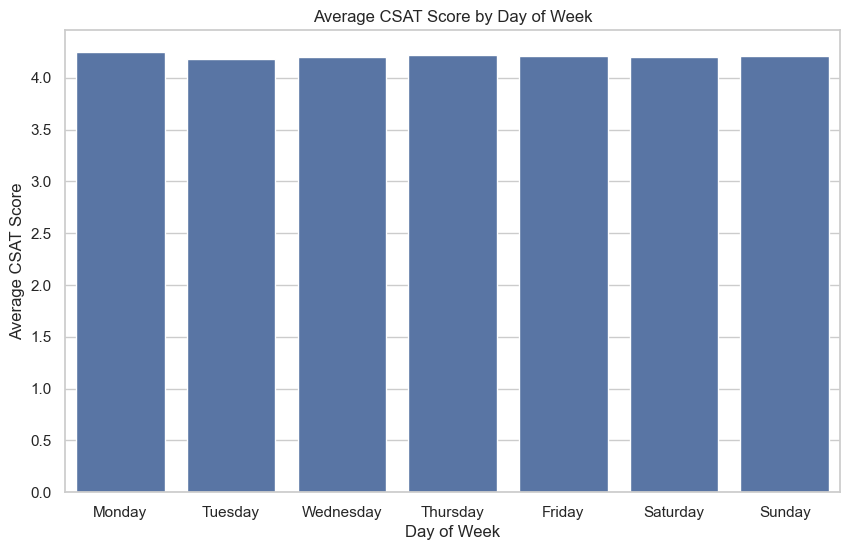

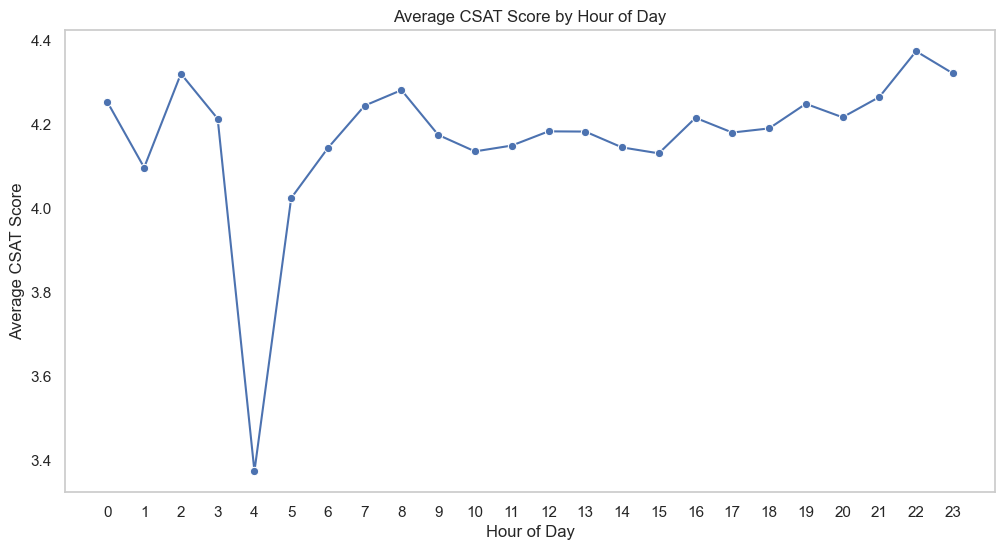

In [82]:
# Create day of week and hour features 
if 'Issue_reported at' in df.columns:
    df['Day_of_week'] = df['Issue_reported at'].dt.day_name()
    df['Hour_of_day'] = df['Issue_reported at'].dt.hour

    # CSAT by day of week
    plt.figure(figsize=(10, 6))
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_csat = df.groupby('Day_of_week')['CSAT Score'].mean()
    # Reindex to ensure correct order
    day_csat = day_csat.reindex(day_order)
    sns.barplot(x=day_csat.index, y=day_csat.values)
    plt.title('Average CSAT Score by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average CSAT Score')
    plt.show()

    # CSAT by hour of day
    plt.figure(figsize=(12, 6))
    hour_csat = df.groupby('Hour_of_day')['CSAT Score'].mean()
    sns.lineplot(x=hour_csat.index, y=hour_csat.values, marker='o', palette ="Set2")
    plt.title('Average CSAT Score by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average CSAT Score')
    plt.xticks(range(0, 24))
    plt.grid(False)
    plt.show()

Agent Performance Metrics


Top 20 Agents by Ticket Volume (with >50 tickets):
                     Ticket_count  CSAT Score  Response time (hrs)  \
Agent_name                                                           
Wendy Taylor                  429    4.347319            65.370907   
Timothy Huff                  265    4.550943            27.764642   
David Smith                   264    4.632576            30.764783   
Jamie Smith                   253    3.968379            21.015094   
Kayla Wilson                  216    4.416667            85.429762   
Julie Williams                200    4.595000            92.520498   
Mrs. Jennifer Stone           200    4.375000            56.808081   
Sharon Bullock                195    4.471795            52.100392   
Matthew White PhD             192    4.390625            79.022691   
Anthony Booth                 177    4.649718            44.922821   
Tina Harrington               177    4.406780            27.980169   
Rebecca Walker                176    4

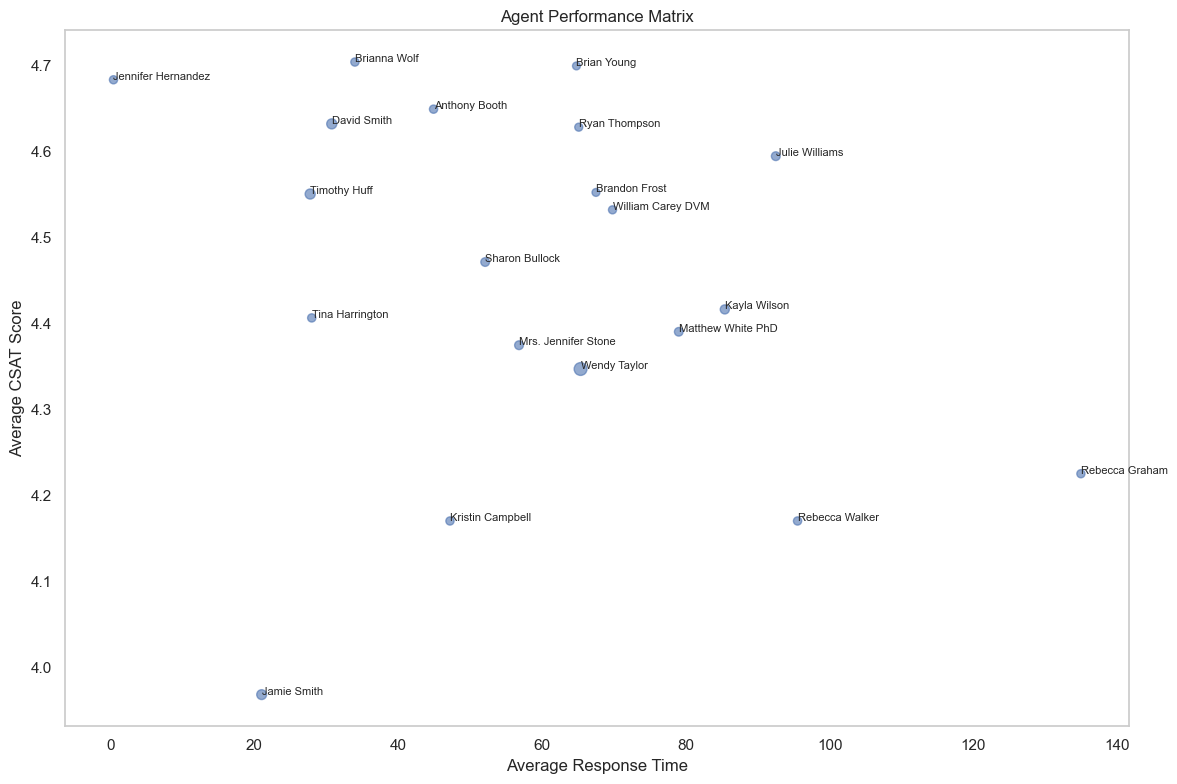

In [83]:
# Create agent performance dashboard
agent_metrics = df.groupby('Agent_name').agg({
    'Unique id': 'count',
    'CSAT Score': 'mean',
    'Response time (hrs)': 'mean',
    'High_CSAT': 'mean'
}).sort_values('Unique id', ascending=False)

agent_metrics = agent_metrics.rename(columns={
    'Unique id': 'Ticket_count',
    'High_CSAT': 'High_CSAT_percentage'
})
agent_metrics['High_CSAT_percentage'] = agent_metrics['High_CSAT_percentage'] * 100

# Only show agents with significant number of tickets (e.g., > 50)
significant_agents = agent_metrics[agent_metrics['Ticket_count'] > 50].head(20)

print("\nTop 20 Agents by Ticket Volume (with >50 tickets):")
print(significant_agents)

# Plot agent performance matrix
plt.figure(figsize=(12, 8))
plt.scatter(
    significant_agents['Response time (hrs)'],
    significant_agents['CSAT Score'],
    s=significant_agents['Ticket_count']/5,  # Size proportional to ticket count
    alpha=0.6
)

# Add agent names as annotations
for idx, row in significant_agents.iterrows():
    plt.annotate(idx, 
                 (row['Response time (hrs)'], row['CSAT Score']),
                 fontsize=8)

plt.title('Agent Performance Matrix')
plt.xlabel('Average Response Time')
plt.ylabel('Average CSAT Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.grid(False)
plt.show()

Summary Findings

In [84]:
print("\n==== SUMMARY OF FINDINGS ====")
print(f"Total records analyzed: {df.shape[0]}")
print(f"Average CSAT Score: {df['CSAT Score'].mean():.2f}")
print(f"Average Response Time: {df['Response time (hrs)'].mean():.2f} hours")
print(f"Percentage of High CSAT (≥4): {df['High_CSAT'].mean()*100:.2f}%")

# Top and bottom channels by CSAT
channel_csat = df.groupby('channel_name').agg({
    'CSAT Score': 'mean',
    'Unique id': 'count'
}).sort_values('CSAT Score', ascending=False)

print("\nTop 3 Channels by CSAT:")
print(channel_csat.head(3))

print("\nBottom 3 Channels by CSAT:")
print(channel_csat.tail(3))

print("\nML Model Performance:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_y_pred):.4f}")

print("\nAnalysis Complete!")


==== SUMMARY OF FINDINGS ====
Total records analyzed: 85907
Average CSAT Score: 4.24
Average Response Time: 77.45 hours
Percentage of High CSAT (≥4): 82.46%

Top 3 Channels by CSAT:
              CSAT Score  Unique id
channel_name                       
Outcall         4.269909      14742
Inbound         4.251372      68142
Email           3.899107       3023

Bottom 3 Channels by CSAT:
              CSAT Score  Unique id
channel_name                       
Outcall         4.269909      14742
Inbound         4.251372      68142
Email           3.899107       3023

ML Model Performance:
Random Forest Accuracy: 0.8070
Logistic Regression Accuracy: 0.8257

Analysis Complete!
